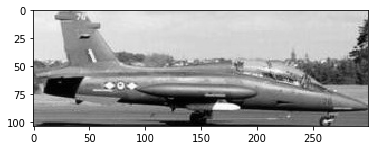

In [18]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

DATADIR= "C:/Users/anilkrishna/Deep learning basics/natural_images"
CATEGORIES = ["airplane", "car", "cat","dog","flower","fruit","motorbike","person"]

for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break  

In [19]:
x_data =[]
y_data = []
import cv2
for label in CATEGORIES:
    path = "C:/Users/anilkrishna/Deep learning basics/natural_images//{0}/".format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [20]:
x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (799, 32, 32, 3) and that of Y is:  (799,)


In [21]:
#stadardizing the input data
x_data = x_data.astype('float32')/255

In [22]:
#converting the y_data into categorical:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)
from keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

In [23]:
#lets shuffle all the data we have:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [25]:
#structuring the CNN model
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [26]:
#let's compile the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [27]:
##fitting the model
history = model.fit(X_train, Y_train, epochs=25, validation_split=0.2)

Train on 428 samples, validate on 107 samples
Epoch 1/25
428/428 [==============================] - 1s 3ms/step - loss: 1.8533 - accuracy: 0.2874 - val_loss: 1.5200 - val_accuracy: 0.5421
Epoch 2/25
428/428 [==============================] - 1s 3ms/step - loss: 1.5301 - accuracy: 0.4696 - val_loss: 1.2810 - val_accuracy: 0.6075
Epoch 3/25
428/428 [==============================] - 1s 3ms/step - loss: 1.2262 - accuracy: 0.6075 - val_loss: 0.9086 - val_accuracy: 0.6636
Epoch 4/25
428/428 [==============================] - 1s 3ms/step - loss: 0.9821 - accuracy: 0.6729 - val_loss: 0.7192 - val_accuracy: 0.8037
Epoch 5/25
428/428 [==============================] - 1s 3ms/step - loss: 0.8429 - accuracy: 0.7290 - val_loss: 0.6987 - val_accuracy: 0.7850
Epoch 6/25
428/428 [==============================] - 1s 3ms/step - loss: 0.6432 - accuracy: 0.7921 - val_loss: 0.6044 - val_accuracy: 0.8131
Epoch 7/25
428/428 [==============================] - 1s 2ms/step - loss: 0.5548 - accuracy: 0.8224 - 

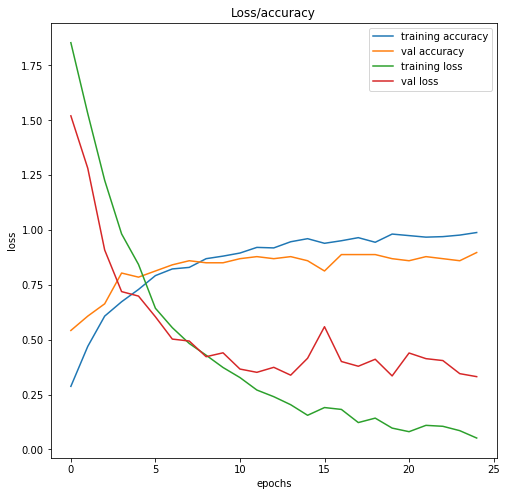

In [28]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [29]:
Y_pred = model.predict_classes(X_test)

In [30]:
#converting over Y test to actual labels.
Y_test = np.argmax(Y_test, axis = 1)

In [31]:
from sklearn.metrics import accuracy_score
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))

the accuracy obtained on the test set is: 0.8181818181818182
